<a href="https://colab.research.google.com/github/15nisha/api_of_job-roles_prediction/blob/main/multilabeltextclassfication_org.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import joblib

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_data = pd.read_csv("/content/drive/MyDrive/model testing/transportation_logistics.csv")

In [ ]:
# json_data.head()
csv_data.head()

,jobs/search_query,jobs/rank_on_page,jobs/job_title_by_google,jobs/job_organization_by_google,jobs/job_city_by_google,jobs/website_by_google,jobs/posted_time_string,jobs/posted_date_by_google,jobs/scraped_date,jobs/desc
0,Air Cargo Ground Crew Supervisor jobs in usa,1,Ground Operations Supervisor,National Airlines,"Orlando, FL",via Jobs,6 days ago,2021-11-19 14:50:26,2021-11-25 14:50:26,No Information Found
1,Air Cargo Ground Crew Supervisor jobs in usa,2,Airline - Ground Handling Manager,"Ameriflight, LLC","Spokane, WA",via Learn4Good.com,6 days ago,2021-11-19 14:50:37,2021-11-25 14:50:37,Must have excellent management and communicati...
2,Air Cargo Ground Crew Supervisor jobs in usa,3,Ramp Agent / Ground Service Agent Supervisor,dnata,"Boston, MA",via Dnata - ICIMS,Over 1 month ago,2021-10-25 14:50:38,2021-11-25 14:50:38,No Information Found
3,Air Cargo Ground Crew Supervisor jobs in usa,4,British Airways Supervisor Ramp Services - $20...,Swissport,"Denver, CO",via LinkedIn,3 days ago,2021-11-22 14:50:49,2021-11-25 14:50:49,•\r\nMust possess strong organizational and mu...
4,Air Cargo Ground Crew Supervisor jobs in usa,5,Supervisor On Duty - Overnight,Worldwide Flight Services (WFS),"Los Angeles, CA",via LinkedIn,Over 1 month ago,2021-10-25 14:50:50,2021-11-25 14:50:50,•\r\nAttend all meetings and complete all trai...


In [ ]:
df = csv_data[["jobs/search_query","jobs/job_title_by_google","jobs/desc"]]
df.head()

,jobs/search_query,jobs/job_title_by_google,jobs/desc
0,Air Cargo Ground Crew Supervisor jobs in usa,Ground Operations Supervisor,No Information Found
1,Air Cargo Ground Crew Supervisor jobs in usa,Airline - Ground Handling Manager,Must have excellent management and communicati...
2,Air Cargo Ground Crew Supervisor jobs in usa,Ramp Agent / Ground Service Agent Supervisor,No Information Found
3,Air Cargo Ground Crew Supervisor jobs in usa,British Airways Supervisor Ramp Services - $20...,•\r\nMust possess strong organizational and mu...
4,Air Cargo Ground Crew Supervisor jobs in usa,Supervisor On Duty - Overnight,•\r\nAttend all meetings and complete all trai...


In [ ]:
df = df.rename(columns={
    "jobs/search_query":"search_query",
    "jobs/job_title_by_google" :"title",
    "jobs/desc":"desc"
})

In [ ]:
df.head()

,search_query,title,desc
0,Air Cargo Ground Crew Supervisor jobs in usa,Ground Operations Supervisor,No Information Found
1,Air Cargo Ground Crew Supervisor jobs in usa,Airline - Ground Handling Manager,Must have excellent management and communicati...
2,Air Cargo Ground Crew Supervisor jobs in usa,Ramp Agent / Ground Service Agent Supervisor,No Information Found
3,Air Cargo Ground Crew Supervisor jobs in usa,British Airways Supervisor Ramp Services - $20...,•\r\nMust possess strong organizational and mu...
4,Air Cargo Ground Crew Supervisor jobs in usa,Supervisor On Duty - Overnight,•\r\nAttend all meetings and complete all trai...


In [ ]:
df['job_roles'] = df['search_query'].apply(lambda x : x.split('jobs')[0])

In [ ]:
df.head()

,search_query,title,desc,job_roles
0,Air Cargo Ground Crew Supervisor jobs in usa,Ground Operations Supervisor,No Information Found,Air Cargo Ground Crew Supervisor
1,Air Cargo Ground Crew Supervisor jobs in usa,Airline - Ground Handling Manager,Must have excellent management and communicati...,Air Cargo Ground Crew Supervisor
2,Air Cargo Ground Crew Supervisor jobs in usa,Ramp Agent / Ground Service Agent Supervisor,No Information Found,Air Cargo Ground Crew Supervisor
3,Air Cargo Ground Crew Supervisor jobs in usa,British Airways Supervisor Ramp Services - $20...,•\r\nMust possess strong organizational and mu...,Air Cargo Ground Crew Supervisor
4,Air Cargo Ground Crew Supervisor jobs in usa,Supervisor On Duty - Overnight,•\r\nAttend all meetings and complete all trai...,Air Cargo Ground Crew Supervisor


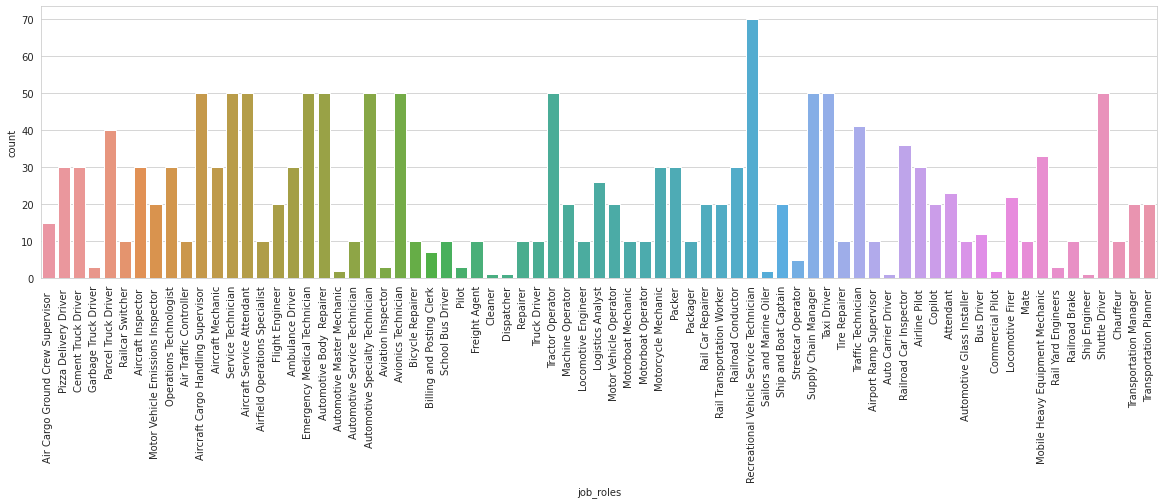

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['job_roles'])
plt.xticks(rotation=90);

In [ ]:
df.columns

Index(['search_query', 'title', 'desc', 'job_roles'], dtype='object')

In [ ]:
df = df[['job_roles','title','desc']]
# df.head()

In [ ]:
df['desc_title'] = df['desc']+' '+df['title']

In [ ]:
df.head()

,job_roles,title,desc,desc_title
0,Air Cargo Ground Crew Supervisor,Ground Operations Supervisor,No Information Found,No Information Found Ground Operations Supervisor
1,Air Cargo Ground Crew Supervisor,Airline - Ground Handling Manager,Must have excellent management and communicati...,Must have excellent management and communicati...
2,Air Cargo Ground Crew Supervisor,Ramp Agent / Ground Service Agent Supervisor,No Information Found,No Information Found Ramp Agent / Ground Servi...
3,Air Cargo Ground Crew Supervisor,British Airways Supervisor Ramp Services - $20...,•\r\nMust possess strong organizational and mu...,•\r\nMust possess strong organizational and mu...
4,Air Cargo Ground Crew Supervisor,Supervisor On Duty - Overnight,•\r\nAttend all meetings and complete all trai...,•\r\nAttend all meetings and complete all trai...


In [ ]:
df['job_roles'].unique()

array(['Air Cargo Ground Crew Supervisor  ', 'Pizza Delivery Driver ',
       'Cement Truck Driver ', 'Garbage Truck Driver',
       'Parcel Truck Driver', 'Railcar Switcher', 'Aircraft Inspector ',
       'Motor Vehicle Emissions Inspector ', 'Operations Technologist',
       'Air Traffic Controller', 'Aircraft Cargo Handling Supervisor',
       'Aircraft Mechanic', 'Service Technician',
       'Aircraft Service Attendant', 'Airfield Operations Specialist',
       'Flight Engineer', 'Ambulance Driver',
       'Emergency Medical Technician', 'Automotive Body  Repairer',
       'Automotive Master Mechanic', 'Automotive Service Technician',
       'Automotive Specialty Technician', 'Aviation Inspector',
       'Avionics Technician', 'Bicycle Repairer',
       'Billing and Posting Clerk', 'School Bus Driver', 'Pilot',
       'Freight Agent', 'Cleaner', 'Dispatcher', 'Repairer',
       'Truck Driver', 'Tractor Operator', 'Machine Operator',
       'Locomotive Engineer', 'Logistics Analyst'

## Text Clearning

In [ ]:
!pip install clean-text

     |████████████████████████████████| 170 kB 9.3 MB/s 
     |████████████████████████████████| 64 kB 3.4 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=a4b265d67e0d4bafca755d836675574337718b5dddfa4e38c0566fdfc3d749ac
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=806ce462ab18cf80e0932090c9c94f579d9baae07f7e81d33872026f485b5e03
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built ftfy emoji


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# load stop words
stop_word = stopwords.words('english')

In [ ]:
from cleantext import clean
import re

def textCleaning(text):      
                         
    #     remove urls
    text = re.sub(r'http\S+', " ", text)

    #     remove mentions
    text = re.sub(r'@\w+',' ',text)

    #     remove hastags
    text = re.sub(r'#\w+', ' ', text)
    
    # take alphanumerical
    text = re.sub(r'\W+', ' ', text)

    #     remove digits
    text = re.sub(r'\d+', ' ', text)

    #     remove html tags
    text = re.sub('r<.*?>',' ', text)
    
    #     remove stop words 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_word])    
      
    
    return clean(text,
        fix_unicode=True,               # fix various unicode errors
        to_ascii=True,                  # transliterate to closest ASCII representation
        lower=True,                     # lowercase text
        no_line_breaks=False,           # fully strip line breaks as opposed to only normalizing them
        no_urls=False,                  # replace all URLs with a special token
        no_emails=False,                # replace all email addresses with a special token
        no_phone_numbers=False,         # replace all phone numbers with a special token
        no_numbers=False,               # replace all numbers with a special token
        no_digits=False,                # replace all digits with a special token
        no_currency_symbols=False,      # replace all currency symbols with a special token
        no_punct=False,                 # remove punctuations
        replace_with_punct="",          # instead of removing punctuations you may replace them
        replace_with_url=" ",
        replace_with_email="<EMAIL>",
        replace_with_phone_number="<PHONE>",
        replace_with_number="<NUMBER>",
        replace_with_digit="0",
        replace_with_currency_symbol="<CUR>",
        lang="en"                       # set to 'de' for German special handling
    )

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [ ]:
data = df['desc'][5]
data

"•\r\nSpecial Demands:Ability to travel as needed\r\n•\r\nSkills:Experienced in Microsoft office software, specifically in data base, spreadsheets and word processing\r\n•\r\nAbility to manage multiple activities and work with a strong sense of urgency is required\r\n4 more items\r\n•\r\nResponsible for the development and continuous improvement of procedures for the calculation and collection of revenue for import service fees, storage fees and other fees and ensure data in CargoSprint and CargoSpot are accurate\r\n•\r\nAct as the point of contact for CargoSprint for CVG, give access to CargoSprint to users\r\n•\r\nTrack and report cargo volumes handled for customers\r\n8 more items\r\nMore job highlightsOverviewKeep track, monitor and maximize revenue generated at the Polar Air Cargo warehouse near the Cincinnati airport (CVG) and act as the primary point of contact for revenue reconciliation. Review trucking invoices for accuracy and ensure billing is accurate.ResponsibilitiesOverse

In [ ]:
textCleaning(data)

'special demands ability travel needed skills experienced microsoft office software specifically data base spreadsheets word processing ability manage multiple activities work strong sense urgency required items responsible development continuous improvement procedures calculation collection revenue import service fees storage fees fees ensure data cargosprint cargospot accurate act point contact cargosprint cvg give access cargosprint users track report cargo volumes handled customers items more job highlightsoverviewkeep track monitor maximize revenue generated polar air cargo warehouse near cincinnati airport cvg act primary point contact revenue reconciliation review trucking invoices accuracy ensure billing accurate responsibilitiesoversee daily import export operations regards data entry document control customs reporting responsible development continuous improvement procedures calculation collection revenue import service fees storage fees fees ensure data cargosprint cargospot

In [ ]:
df['clean_desc_title'] = df['desc_title'].apply(lambda x: textCleaning(x))

In [ ]:
df.head()

,job_roles,title,desc,desc_title,clean_desc_title
0,Air Cargo Ground Crew Supervisor,Ground Operations Supervisor,No Information Found,No Information Found Ground Operations Supervisor,no information found ground operations supervisor
1,Air Cargo Ground Crew Supervisor,Airline - Ground Handling Manager,Must have excellent management and communicati...,Must have excellent management and communicati...,must excellent management communication skills...
2,Air Cargo Ground Crew Supervisor,Ramp Agent / Ground Service Agent Supervisor,No Information Found,No Information Found Ramp Agent / Ground Servi...,no information found ramp agent ground service...
3,Air Cargo Ground Crew Supervisor,British Airways Supervisor Ramp Services - $20...,•\r\nMust possess strong organizational and mu...,•\r\nMust possess strong organizational and mu...,must possess strong organizational multi taski...
4,Air Cargo Ground Crew Supervisor,Supervisor On Duty - Overnight,•\r\nAttend all meetings and complete all trai...,•\r\nAttend all meetings and complete all trai...,attend meetings complete training certificatio...


In [ ]:
df.duplicated().sum()

165

In [ ]:
df.shape

(1592, 5)

# target variable (job_roles) encoding

In [ ]:
y = df['job_roles']
y = y.values.reshape(-1,1)

In [ ]:
# mulitlable encoder
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
mlb = MultiLabelBinarizer()
mlb.fit_transform(y)
# y_mul = mlb.fit_transform(y)

In [ ]:
joblib.dump(mlb, 'transportation_class')

['transportation_class']

In [ ]:
# import pickle
# filename = 'classes.txt'
# pickle.dump(mlb, open(filename, 'wb'))

In [ ]:
# y_mul
# len(y_mul)
# y_mul[0]

In [ ]:
mlb.classes_

array(['Air Cargo Ground Crew Supervisor  ', 'Air Traffic Controller',
       'Aircraft Cargo Handling Supervisor', 'Aircraft Inspector ',
       'Aircraft Mechanic', 'Aircraft Service Attendant',
       'Airfield Operations Specialist', 'Airline Pilot ',
       'Airport Ramp Supervisor ', 'Ambulance Driver', 'Attendant ',
       'Auto Carrier Driver ', 'Automotive Body  Repairer',
       'Automotive Glass Installer ', 'Automotive Master Mechanic',
       'Automotive Service Technician', 'Automotive Specialty Technician',
       'Aviation Inspector', 'Avionics Technician', 'Bicycle Repairer',
       'Billing and Posting Clerk', 'Bus Driver ', 'Cement Truck Driver ',
       'Chauffeur ', 'Cleaner', 'Commercial Pilot ', 'Copilot ',
       'Dispatcher', 'Emergency Medical Technician', 'Flight Engineer',
       'Freight Agent', 'Garbage Truck Driver', 'Locomotive Engineer',
       'Locomotive Firer ', 'Logistics Analyst', 'Machine Operator',
       'Mate ', 'Mobile Heavy Equipment Mechanic

## Embedding x axis jobs roles

In [ ]:
x = df['clean_desc_title']
len(x)

1592

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# tfidf_vectorizer = TfidfVectorizer(max_df=0.8,max_features=100000)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000, min_df=10)

In [ ]:
# y_mul

In [ ]:
# split the dataset into training and valid test 
xtrain, xval, ytrain, yval = train_test_split(x, y_mul, test_size=0.2, random_state=9)

In [ ]:
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((1273,), (319,), (1273, 73), (319, 73))

In [ ]:
import joblib

In [ ]:
tfidf_vectorizer.fit(xtrain)

TfidfVectorizer(max_features=10000, min_df=10)

In [ ]:
joblib.dump(tfidf_vectorizer,'transportation_vectorizer')

['transportation_vectorizer']

In [ ]:
# create Tf-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

# model building

In [ ]:
from sklearn.linear_model import LogisticRegression
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier
# Performance metric
from sklearn.metrics import f1_score

In [ ]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [ ]:
# fit the model
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
# predict movie geners on the validation set
y_pred = clf.predict(xval_tfidf)

In [ ]:
y_pred[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
mlb.inverse_transform(y_pred)[3]

()

In [ ]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.20555555555555555

In [ ]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [ ]:
y_pred_prob[3]

array([0.01030581, 0.00905002, 0.01553362, 0.31704668, 0.01765682,
       0.05334319, 0.00727343, 0.02099392, 0.00394483, 0.01359878,
       0.00961827, 0.0007572 , 0.01180219, 0.00483806, 0.0014225 ,
       0.00482209, 0.01438511, 0.00613146, 0.01374327, 0.00475496,
       0.00464185, 0.00399543, 0.00759212, 0.00568913, 0.00079073,
       0.00147679, 0.00901159, 0.00105443, 0.01412491, 0.01230487,
       0.00481169, 0.00145954, 0.00398345, 0.01366839, 0.00802979,
       0.00758898, 0.00977795, 0.00786012, 0.01972327, 0.01343912,
       0.00651595, 0.00636194, 0.0137988 , 0.01175097, 0.00491086,
       0.01198801, 0.01145449, 0.0008364 , 0.01038898, 0.00697087,
       0.00654929, 0.0020819 , 0.0079461 , 0.00728516, 0.0430963 ,
       0.01609492, 0.02346793, 0.00702795, 0.00199492, 0.00504179,
       0.00914846, 0.00074379, 0.00974421, 0.01084714, 0.00374234,
       0.0124716 , 0.0182991 , 0.00695979, 0.01749907, 0.01398027,
       0.01447155, 0.00716945, 0.00850377])

In [ ]:
t = 0.04 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [ ]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.5650224215246638

## Checking prediction

In [ ]:
def infer_tags(q):
    q = textCleaning(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return mlb.inverse_transform(q_pred)

In [ ]:
# infer_tags(df['clean_desc'][50])

# try with some new models

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True)
svm_clf = OneVsRestClassifier(svc)

In [ ]:
svm_clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=SVC(C=1000000000.0, gamma=1e-07,
                                  probability=True))

In [ ]:
joblib.dump(svm_clf,'transportation_model')

['transportation_model']

In [ ]:
# saving the model

import pickle
filename = 'svm_model.sav'
pickle.dump(svm_clf, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
svm_pred = loaded_model.predict(xval_tfidf)

In [ ]:
svm_pred[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [ ]:
svm_pred[30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0])

In [ ]:
# evaluate performance
f1_score(yval, svm_pred, average="micro")

0.24232456140350875

In [ ]:
# predict probabilities
# svm_y_pred_prob = svm_clf.predict_proba(xval_tfidf)
svm_y_pred_prob = svm_clf.predict_proba(xval_tfidf)

In [ ]:
svm_y_pred_prob[30]

array([2.78698312e-03, 6.09251475e-02, 2.25528818e-02, 7.46940460e-04,
       1.32322866e-03, 1.76709312e-02, 1.30254459e-05, 3.61917018e-04,
       3.93064682e-05, 2.11456654e-04, 1.36472136e-02, 6.96820870e-04,
       2.38821689e-05, 2.37509080e-03, 1.29361313e-04, 3.83676266e-03,
       2.15046324e-02, 4.72510541e-03, 2.03002860e-03, 1.13023632e-04,
       2.93712529e-04, 4.80444979e-03, 1.58418221e-07, 1.72649013e-02,
       1.04244485e-03, 1.35888119e-03, 1.00002285e-02, 5.77127732e-04,
       6.20977118e-04, 2.21781857e-06, 4.25015676e-04, 4.47351267e-04,
       1.25496046e-03, 1.04108661e-02, 1.14535917e-06, 9.46577605e-04,
       3.08232634e-04, 1.27767220e-03, 3.79550495e-03, 5.71753706e-04,
       1.83046447e-03, 1.94492450e-04, 1.81024063e-02, 1.20744406e-03,
       1.21703914e-04, 1.95618383e-02, 5.85637929e-04, 7.63584089e-04,
       2.75454863e-03, 1.28464975e-03, 1.53137840e-03, 2.46948043e-03,
       4.49525736e-04, 4.17229374e-03, 5.37443222e-03, 1.47995931e-02,
      

In [ ]:
def infer_tags_svm(q):
    q = textCleaning(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = loaded_model.predict(q_vec)
    return mlb.inverse_transform(q_pred)

In [ ]:
infer_tags_svm(df['clean_desc_title'][100])

[('Emergency Medical Technician',
  'Packer',
  'Parcel Truck Driver',
  'Taxi Driver',
  'Tractor Operator')]

In [ ]:
infer_tags_svm(df['clean_desc_title'][50])

[('Automotive Specialty Technician',
  'Cement Truck Driver ',
  'Emergency Medical Technician',
  'Packer',
  'Parcel Truck Driver',
  'Recreational Vehicle Service Technician',
  'Tractor Operator')]

In [ ]:
# infer_tags_svm(df['clean_desc'][17])

In [ ]:
text = """
Pay: $76,000-$90,000 annually, 25% of load revenue to start, increases yearly

Family/home time: Every weekend

Experience: Valid Class A Commercial Driver's License (CDL) + 6 months experience on the road

Driving area: (Mainly) Southeastern USA

Job Description:

Freedom Trans Dedicated is hiring a regional flatbed trailer truck driver to pick up and deliver on a multi-stop route for a dedicated Customer.

Benefits
• $5,000 limited-time transition bonus
• Health, dental, and vision insurance benefits after 90 days
• Life insurance and 401k
• Elite pass
• Late-model equipment with APU's, inverters, EpicVue TVs, and refrigerators
• Safety bonuses and monthly mileage bonuses
• Rider and pet policy available
• Elite pass
• Family/home time every weekend
• Paid orientation
• Unlimited $2,000 referral bonus potential

Qualifications/Skills
• Acceptable safety record concerning preventable accidents, traffic violations, and roadside inspections
• No serious violations or accidents
• Stable work history
• No drug or alcohol issues
• Friendly, reliable, courteous, honest, and patient
• Good decision maker
• Safety minded

Apply Now: Regional Flatbed Truck Driver-$5,000 Transition Bonus

For more information, call 888-FTD-PAYS

About Freedom Trans Dedicated

Freedom Trans Dedicated is a family-oriented asset-based logistics company providing fantastic career opportunities in the transportation industry. If you are a driven, detail-oriented individual with high goals for success, Freedom Trans Dedicated is the place for you! Our company provides room for exponential growth and compensation. We do our best to accommodate our driver’s schedules whenever possible. We maintain a state-of-the-art fleet comprised of all truck and trailer combinations
"""

In [ ]:
text1 = """
Brambles companies, including CHEP, help move more goods to more people, in more places than any other organisation on earth. Our 330 million pallets, crates and containers are continuously in motion, forming the invisible backbone of the global supply chain and the world’s biggest brands trust us to help them transport their goods more efficiently, sustainably and safely. As pioneers of the sharing economy, Brambles created one of the world's most sustainable logistics businesses through the share and reuse of its platforms under a model known as ‘pooling’. Brambles primarily serves the fast-moving consumer goods (e.g. dry food, grocery, and health and personal care), fresh produce, beverage, retail and general manufacturing industries. The Group employs more than 10,000 people and operates in over 60 countries with its largest operations in North America and Western Europe. For further information, please visit www.brambles.com.

Job Description

Description

Position Purpose

The Logistics Coordinator, LC, position will be responsible for planning and delivery roughly 100 shipments/week both inbound and outbound from our North America supply chain network. The LC will sit within a team of 4 total coordinators, each with regional responsibility. The LC will work closely with transportation, planning, and operations providers to achieving customer expectations of on time delivery.

Scope
• Weekly/Monthly reporting of key metrics
• Execution of customer order request for inbound and outbound territory
• Management of inventory levels in assigned region, supporting rest of network
• Work closely with transportation providers to secure freight and deliver on time, both truck load, LTL, intermodal, and limited ocean going freight as needed
• Develop and deliver new cost out initiatives, working with internal teams, LCs, and Log MGR
• Support LCs as backup solution to help cover PTO and assist in times of increased workload
• Position will have a dynamic element, where ask and deliverables can change to support the business

Major/Key Accountabilities
• Plan all loads inbound and outbound in assigned region
• Work with transportation network to tender loads for on time deliver and pick up
• Manage inventory levels at assigned plant, to delivery on time to our customers
• Ability to operate in a high paced organization and effectively achieve solutions to challenging problems. CHEP environment requires ability to work with other groups to negotiate support and mutual progress towards a goal, but the ability to elevate the issue and or demand results when appropriate progress is not being achieved
• Ability to accept rapidly changing priorities, drop everything to refocus on a new goal, but the determination and persistence to return again to difficult projects when the new challenge has passed. Strong time management, organization, prioritization and self-directed drive a must
• High levels of energy, enthusiasm, and esprit de corps a must. Must be able to motivate the team and self when extremely challenging results are demanded with limited support, systems or infrastructure

Measures
• On Time Performance
• Mapping Compliance
• Cost per container, issues, collections, & transfers
• Routing guide and spot market transportation procurement %s and over benchmark

Authority/ Decision Making
• Recommend and implement cost savings solutions
• Approve real time freight quotes

Key contacts

Internal:
• Logistics, Operations, Quality, Customer sales/service, & Finance, Voice of the Customer

External:
• Carrier Base, 3PL Management Groups at Service Centers

Qualifications

Essential
• Positive attitude with amplitude to learn
• Excellent communication skills both verbal and written
• Organizational skills
• Proficiency in Excel
• Ability to teach others
• Bachelor’s Degree in related field or 2+ years of relevant experience

Desirable
• Experience in the following areas:
• SAP
• Access
• Excel
• BluJay or similar Transportation Management System
• Sales Force

Experience
• Bachelor’s degree in a business or technical field preferred
• 2+ years’ experience in Transportation, Logistics, or Supply Chain

Skills and Knowledge
• Ability to work analytically inside of large data sets to find insights to drive solutions and cost out
• Develops positive relationship with third party providers, and ensures consistent achievement of expectation/ requirements
• General knowledge of the transportation industry

Languages

Essential:
• English

Desirable:
• Spanish

Preferred Education

Bachelors

Preferred Level of Work Experience

1 - 3 years

We are an Equal Opportunity Employer and we are committed to developing a diverse workforce in which everyone is treated fairly, with respect, and has the opportunity to contribute to business success while realizing his or her potential. This means harnessing the unique skills and experience that each individual brings and we do not discriminate against any employee or applicant for employment because of race, color, sex, age, national origin, religion, sexual orientation, gender identity, status as a veteran, and basis of disability or any other federal, state, or local protected class.

Individuals fraudulently misrepresenting themselves as Brambles or CHEP representatives have scheduled interviews and offered fraudulent employment opportunities with the intent to commit identity theft or solicit money. Brambles and CHEP never conduct interviews via online chat or request money as a term of employment. If you have a question as to the legitimacy of an interview or job offer, please contact us at recruitment@brambles.com
"""

In [ ]:
# infer_tags_svm(text1)

In [ ]:
df.columns

Index(['job_roles', 'title', 'desc', 'desc_title', 'clean_desc_title'], dtype='object')

In [ ]:
giving_data = df.copy()

In [ ]:
giving_data.columns

Index(['job_roles', 'title', 'desc', 'desc_title', 'clean_desc_title'], dtype='object')

In [ ]:
giv = giving_data.sample(frac=0.1).reset_index()
giv.shape

(159, 6)

In [ ]:
giv = giv[['title','clean_desc_title']]

In [ ]:
giv['predicted_roles'] = giv['clean_desc_title'].apply(lambda x: infer_tags_svm(x))

In [ ]:
giv.head()

,title,clean_desc_title,predicted_roles
0,Tractor Trailer Driver,commercial driver license class a tanker endor...,"[(Emergency Medical Technician, Packer, Tracto..."
1,Senior Logistics Analyst,partner external suppliers vendors transportat...,"[(Logistics Analyst, Packer)]"
2,RV Customer Service Technician,inspect rvs prior check w customers document o...,"[(Aircraft Service Attendant, Automotive Speci..."
3,Aircraft Inspector Dothan,maintain proficiency various inspection aides ...,"[(Aircraft Inspector , Attendant , Motor Vehic..."
4,Emissions Inspector,ability manage cash non cash payments great te...,"[(Aircraft Inspector , Aircraft Service Attend..."


In [ ]:
# giv = giv[giv['clean_desc'] != "no information found"]

In [ ]:
giv.to_csv("output_job_roles.csv", index=False)

**experimenting**

In [ ]:
loaded_vectorizer = joblib.load('transportation_vectorizer')


In [ ]:
loaded_new_model = joblib.load('transportation_model')

In [ ]:
loaded_class = joblib.load('transportation_class')

In [ ]:
def infer_tags_new(q):
    q = textCleaning(q)
    q_vec = loaded_vectorizer.transform([q])
    q_pred = loaded_new_model.predict(q_vec)
    return loaded_class.inverse_transform(q_pred)

In [ ]:
infer_tags_new(df['clean_desc_title'][100])

[('Emergency Medical Technician',
  'Packer',
  'Parcel Truck Driver',
  'Taxi Driver',
  'Tractor Operator')]